# Utility Assistant Dataset - Increasing Funding 

### 🛑 Because the dataset contains real client names and information. This notebook is public, hence some of the code are commented out so no df containing the client name will be printed. 

Data that needs to be in clean in **Excel**:

* birthday data type
* birthday entered wrong (eg: 1/1/5674, 12-5/1968, 123/2/1970)
* birthday not completed
* spell out birthday month
* number stored as object or the number is stored as text (use =value()) to convert back. Use =IF(AK2="","",VALUE(AK2)) to convert to float number in excel if containing NaN in rows. 
* extremely high monthly income 
* negative birthday
* negative income
* find all and replace to fix spelling in the utility company columns
* turn name into cap for first letter using =proper
* grab the year off birthday using =TEXT(cell, "yyyy")
* use =LEFT() or =RIGHT() to grab the specific number for household size-long

# Data Cleaning and EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_excel('/content/ceap.xlsx')

In [ ]:
# Convert birthday into datetime

df['Applicant Birthday'] = pd.to_datetime(df['Applicant Birthday'])
df['Household Member 2 - Birthday'] = pd.to_datetime(df['Household Member 3 - Birthday'])
df['Household Member 3 - Birthday'] = pd.to_datetime(df['Household Member 3 - Birthday'])
df['Household Member 4 - Birthday'] = pd.to_datetime(df['Household Member 4 - Birthday'])

In [ ]:
# Original: 1608 rows and 48 columns

df.shape

(3806, 48)

In [ ]:
# Data type conversion in Python (for datetime) and in Excel using =value()

df.dtypes

Submission Date                                       object
Zip Code                                              object
Applicant Name                                        object
Applicant Birthday                            datetime64[ns]
Birth Year                                           float64
Applicant Age                                        float64
Applicant Gender                                      object
Applicant Race and Ethnicity                          object
Household Size-Long                                   object
Household Size                                       float64
Owner/Renter                                          object
Type Of House                                         object
Mortgage/Rent                                        float64
US Citizen                                            object
Income                                                object
Your Income Source                                    object
Monthly Pretax Income   

In [ ]:
# Numerical data description. Use this to look for extremely outliers.

df.describe()

,Birth Year,Applicant Age,Household Size,Mortgage/Rent,Monthly Pretax Income,Birth Year - 2,Household Member 2 - Age,Household Member 2 - Monthly Pretax Income,Birth Year - 3,Household Member 3 - Age,Household Member 3 - Monthly Pretax Income,Birth Year - 4,Household Member 4 - Age,Household Member 4 - Monthly Pretax Income
count,3802.000000,3802.000000,3803.000000,3805.000000,3802.000000,2070.000000,2071.000000,2069.000000,580.000000,577.000000,579.000000,171.000000,175.000000,177.000000
mean,1950.270910,70.687796,2.378385,572.772102,826.160029,1969.270531,51.407533,838.058743,1980.708621,40.222704,799.766304,1985.602339,34.771429,489.129944
std,14.074677,14.060871,1.364858,434.521058,644.359120,26.196570,26.076842,499.491490,26.444707,26.493370,514.338132,27.169291,27.237024,550.183058
min,1916.000000,21.000000,1.000000,0.000000,0.000000,1924.000000,0.000000,0.000000,1930.000000,0.000000,0.000000,1930.000000,0.000000,0.000000
25%,1940.000000,64.000000,1.000000,175.000000,595.500000,1947.000000,29.000000,595.500000,1958.750000,17.000000,469.500000,1965.000000,12.000000,0.000000
50%,1948.000000,73.000000,2.000000,566.000000,794.000000,1962.000000,59.000000,836.000000,1984.000000,37.000000,912.000000,1992.000000,28.000000,0.000000
75%,1957.000000,81.000000,3.000000,951.000000,939.000000,1991.000000,73.000000,1179.000000,2004.000000,62.000000,1215.000000,2009.000000,55.000000,997.000000
max,2000.000000,105.000000,5.000000,4000.000000,11136.000000,2021.000000,94.000000,7300.000000,2021.000000,91.000000,2000.000000,2020.000000,91.000000,1700.000000


In [ ]:
# Missing values
# For the main applicants, we have less than 2.5% missing data. Because not all applicants have family members, it's natural to see much higher missing data % for family member 2,3 and 4. 

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,percent_missing
Birth Year - 4,95.507094
Household Member 4 - Age,95.401997
Household Member 4 - Income Source,95.349448
Household Member 4 - Monthly Pretax Income,95.349448
Household Member 4 - Income,95.349448
Household Member 4 - Birthday,95.349448
Household Member 4 - Race,95.349448
Household Member 4 - Gender,95.349448
Household Member 4 - Citizen,95.349448
Household Member 4 - Name,95.349448


In [ ]:
# Duplicated rows. Because an applicant can have same name and birthday. I incoporated more columns so that I'm more certain it's the same applicant.

duplicate_rows = df[df.duplicated(subset=['Applicant Name','Applicant Birthday','Applicant Gender','Applicant Age', 'Zip Code', 
                                          'Applicant Race and Ethnicity', 'US Citizen', 'Household Size', 'Income', 'Owner/Renter','Electricity Provider'], keep='first')]


duplicate_rows

,Submission Date,Zip Code,Applicant Name,Applicant Birthday,Birth Year,Applicant Age,Applicant Gender,Applicant Race and Ethnicity,Household Size-Long,Household Size,Owner/Renter,Type Of House,Mortgage/Rent,US Citizen,Income,Your Income Source,Monthly Pretax Income,Electricity Provider,Household Member 2 - Name,Household Member 2 - Citizen,Household Member 2 - Gender,Household Member 2 - Race,Household Member 2 - Birthday,Birth Year - 2,Household Member 2 - Age,Household Member 2 - Income,Household Member 2 - Monthly Pretax Income,Household Member 2 - Income Source,Household Member 3 - Name,Household Member 3 - Citizen,Household Member 3 - Gender,Household Member 3 - Race,Household Member 3 - Birthday,Birth Year - 3,Household Member 3 - Age,Household Member 3 - Income,Household Member 3 - Monthly Pretax Income,Household Member 3 - Income Source,Household Member 4 - Name,Household Member 4 - Citizen,Household Member 4 - Gender,Household Member 4 - Race,Household Member 4 - Birthday,Birth Year - 4,Household Member 4 - Age,Household Member 4 - Income,Household Member 4 - Monthly Pretax Income,Household Member 4 - Income Source
3,2021/11/15 20:04:23,77084,Lam Vu,1947-10-04,1947.0,74.0,Male,Asian,2 Two people,2.0,Owner,Single Family Home,0.0,Yes,Yes,"Social Security, SSI, Pension",670.5,V247,Dung Nghiem,Yes,Female,Asian,NaT,1954.0,67.0,Yes,537.5,"Social Security, SSI, Pension",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19,2021/10/06 12:41:45,77077,Weixin Wu,1946-11-25,1946.0,75.0,Male,Asian,2 Two people,2.0,Owner,Townhouse,0.0,Yes,Yes,"Social Security, SSI, Pension",994.0,Ampra Energy,Zhenrong Li,No,Female,Asian,NaT,1950.0,71.0,Yes,454.0,"Social Security, SSI, Pension",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
21,2021/10/06 12:07:39,77036,Ying Fon Gong,1938-12-05,1938.0,83.0,Female,Asian,1 Myself,1.0,Renter,Apartment,0.0,Yes,Yes,"Social Security, SSI, Pension",794.0,Ambit,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
22,2021/09/30 17:49:33,77072,Eunice Parada,1977-01-08,1977.0,44.0,Female,Hispanic / Latino,4 Four people,4.0,Renter,Single Family Home,1250.0,Yes,Yes,Job (jobs with pay stubs),1300.0,Just energy,Fredy Quintanilla,No,Male,Hispanic / Latino,2004-11-06,1960.0,61.0,No,0.0,Unemployed with No Income,Sherlyn Amaya,Yes,Other,Hispanic / Latino,2004-11-06,2004.0,16.0,No,0.0,Unemployed with No Income,Liliana Parada,Yes,Female,Hispanic / Latino,2013-06-19,2013.0,8.0,No,0.0,Unemployed with No Income
30,2021/09/21 13:40:54,77036,Ying Fon Gong,1938-12-05,1938.0,83.0,Female,Asian,1 Myself,1.0,Renter,Apartment,0.0,Yes,Yes,"Social Security, SSI, Pension",794.0,Ambit,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2021/01/20 16:06:25,77072,Charlie Vu,1953-07-28,1953.0,68.0,Male,Asian,1 Myself,1.0,Owner,Apartment,0.0,Yes,No,"Social Security, SSI, Pension",812.0,TXU,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1555,2021/01/14 19:52:11,77031,Ngoc Huyen Truong,1955-12-10,1955.0,66.0,Female,Asian,2 Two people,2.0,Owner,Single Family Home,682.0,Yes,No,"Social Security, SSI, Pension",877.0,V247,Kevin Truong Trinh,Yes,Male,Asian,NaT,2000.0,20.0,Yes,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1559,2021/01/12 12:39:11,77031,Ngoc Huyen Truong,1955-12-10,1955.0,66.0,Female,Asian,2 Two people,2.0,Owner,Single Family Home,682.0,Yes,No,"Social Security, SSI, Pension",877.0,V247,Kevin Truong Trinh,Yes,Male,Asian,NaT,2000.0,20.0,Yes,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Drop the duplicated rows and reset the index

df.drop_duplicates(subset=['Applicant Name','Applicant Birthday','Applicant Gender','Applicant Age', 'Zip Code', 
                                          'Applicant Race and Ethnicity', 'US Citizen', 'Household Size', 'Income', 'Owner/Renter','Electricity Provider'], keep='first', inplace=True)

df.reset_index(drop=True, inplace=True)
df.head(5)


,Submission Date,Zip Code,Applicant Name,Applicant Birthday,Birth Year,Applicant Age,Applicant Gender,Applicant Race and Ethnicity,Household Size-Long,Household Size,Owner/Renter,Type Of House,Mortgage/Rent,US Citizen,Income,Your Income Source,Monthly Pretax Income,Electricity Provider,Household Member 2 - Name,Household Member 2 - Citizen,Household Member 2 - Gender,Household Member 2 - Race,Household Member 2 - Birthday,Birth Year - 2,Household Member 2 - Age,Household Member 2 - Income,Household Member 2 - Monthly Pretax Income,Household Member 2 - Income Source,Household Member 3 - Name,Household Member 3 - Citizen,Household Member 3 - Gender,Household Member 3 - Race,Household Member 3 - Birthday,Birth Year - 3,Household Member 3 - Age,Household Member 3 - Income,Household Member 3 - Monthly Pretax Income,Household Member 3 - Income Source,Household Member 4 - Name,Household Member 4 - Citizen,Household Member 4 - Gender,Household Member 4 - Race,Household Member 4 - Birthday,Birth Year - 4,Household Member 4 - Age,Household Member 4 - Income,Household Member 4 - Monthly Pretax Income,Household Member 4 - Income Source
0,2021/11/17 14:49:08,77083,Remi Olonade,1958-12-15,1958.0,63.0,Male,Black,3 Three people,3.0,Owner,Single Family Home,981.0,Yes,Yes,"Social Security, SSI, Pension",653.0,Reliant,Erie Olonade,Yes,Male,Black,1998-06-05,1998.0,23.0,No,NaN,Unemployed with No Income,Eric Olonade,Yes,Male,Black,1998-06-05,1998.0,23.0,No,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,2021/11/15 20:48:35,77044,Tricina Gambrell,1995-03-24,1995.0,26.0,Female,Black,2 Two people,2.0,Renter,Apartment,0.0,Yes,No,Unemployed with No Income,0.0,TXU,Khalil Gambrell,Yes,Male,Black,NaT,2017.0,4.0,No,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2021/11/15 20:40:09,77084,Lam Vu,1947-10-04,1947.0,74.0,Male,Asian,2 Two people,2.0,Owner,Single Family Home,0.0,Yes,Yes,"Social Security, SSI, Pension",670.5,V247,Dung Nghiem,Yes,Female,Asian,NaT,1954.0,67.0,Yes,537.5,"Social Security, SSI, Pension",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,2021/11/15 19:16:30,77070,Markeshia Bradley,1995-11-06,1995.0,26.0,Female,Black,1 Myself,1.0,Renter,Apartment,1133.5,Yes,No,Unemployed with No Income,0.0,Rhythm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,2021/11/15 15:34:24,77042,Lindsay Rodriguez,1997-08-08,1997.0,24.0,Female,Hispanic / Latino,2 Two people,2.0,Renter,Apartment,850.0,Yes,Yes,Unemployed with No Income,890.0,TXU,Carmelo Crawford,Yes,Male,Others,NaT,2019.0,2.0,No,0.0,none,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
# What is the average age per household?

df['Household Avg Age']=df[["Applicant Age", "Household Member 2 - Age","Household Member 3 - Age","Household Member 4 - Age"]].mean(axis=1)
df['Household Avg Age']

df.head(5)

,Submission Date,Zip Code,Applicant Name,Applicant Birthday,Birth Year,Applicant Age,Applicant Gender,Applicant Race and Ethnicity,Household Size-Long,Household Size,Owner/Renter,Type Of House,Mortgage/Rent,US Citizen,Income,Your Income Source,Monthly Pretax Income,Electricity Provider,Household Member 2 - Name,Household Member 2 - Citizen,Household Member 2 - Gender,Household Member 2 - Race,Household Member 2 - Birthday,Birth Year - 2,Household Member 2 - Age,Household Member 2 - Income,Household Member 2 - Monthly Pretax Income,Household Member 2 - Income Source,Household Member 3 - Name,Household Member 3 - Citizen,Household Member 3 - Gender,Household Member 3 - Race,Household Member 3 - Birthday,Birth Year - 3,Household Member 3 - Age,Household Member 3 - Income,Household Member 3 - Monthly Pretax Income,Household Member 3 - Income Source,Household Member 4 - Name,Household Member 4 - Citizen,Household Member 4 - Gender,Household Member 4 - Race,Household Member 4 - Birthday,Birth Year - 4,Household Member 4 - Age,Household Member 4 - Income,Household Member 4 - Monthly Pretax Income,Household Member 4 - Income Source,Household Avg Age
0,2021/11/17 14:49:08,77083,Remi Olonade,1958-12-15,1958.0,63.0,Male,Black,3 Three people,3.0,Owner,Single Family Home,981.0,Yes,Yes,"Social Security, SSI, Pension",653.0,Reliant,Erie Olonade,Yes,Male,Black,1998-06-05,1998.0,23.0,No,NaN,Unemployed with No Income,Eric Olonade,Yes,Male,Black,1998-06-05,1998.0,23.0,No,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,36.333333
1,2021/11/15 20:48:35,77044,Tricina Gambrell,1995-03-24,1995.0,26.0,Female,Black,2 Two people,2.0,Renter,Apartment,0.0,Yes,No,Unemployed with No Income,0.0,TXU,Khalil Gambrell,Yes,Male,Black,NaT,2017.0,4.0,No,0.0,Unemployed with No Income,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,15.000000
2,2021/11/15 20:40:09,77084,Lam Vu,1947-10-04,1947.0,74.0,Male,Asian,2 Two people,2.0,Owner,Single Family Home,0.0,Yes,Yes,"Social Security, SSI, Pension",670.5,V247,Dung Nghiem,Yes,Female,Asian,NaT,1954.0,67.0,Yes,537.5,"Social Security, SSI, Pension",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,70.500000
3,2021/11/15 19:16:30,77070,Markeshia Bradley,1995-11-06,1995.0,26.0,Female,Black,1 Myself,1.0,Renter,Apartment,1133.5,Yes,No,Unemployed with No Income,0.0,Rhythm,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,26.000000
4,2021/11/15 15:34:24,77042,Lindsay Rodriguez,1997-08-08,1997.0,24.0,Female,Hispanic / Latino,2 Two people,2.0,Renter,Apartment,850.0,Yes,Yes,Unemployed with No Income,890.0,TXU,Carmelo Crawford,Yes,Male,Others,NaT,2019.0,2.0,No,0.0,none,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,13.000000


In [ ]:
#Checking column name and length. Alternative to df.columns

features = df.columns[:]
print(f'Column Names: {", ".join(features)}\nColumn Length: {len(features)}')

Column Names: Submission Date, Zip Code, Applicant Name, Applicant Birthday, Birth Year, Applicant Age, Applicant Gender, Applicant Race and Ethnicity, Household Size-Long, Household Size, Owner/Renter, Type Of House, Mortgage/Rent, US Citizen, Income, Your Income Source, Monthly Pretax Income, Electricity Provider, Household Member 2 - Name, Household Member 2 - Citizen, Household Member 2 - Gender, Household Member 2 - Race, Household Member 2 - Birthday, Birth Year - 2, Household Member 2 - Age, Household Member 2 - Income, Household Member 2 - Monthly Pretax Income, Household Member 2 - Income Source, Household Member 3 - Name, Household Member 3 - Citizen, Household Member 3 - Gender, Household Member 3 - Race , Household Member 3 - Birthday, Birth Year - 3, Household Member 3 - Age, Household Member 3 - Income, Household Member 3 - Monthly Pretax Income, Household Member 3 - Income Source, Household Member 4 - Name, Household Member 4 - Citizen, Household Member 4 - Gender , Hous

In [ ]:
# Gender group and their average age

df.groupby('Applicant Gender')[['Applicant Gender', 'Applicant Age']].mean()

,Applicant Age
Applicant Gender,
Female,70.052916
Male,71.059020


In [ ]:
# Obtain the gross household income from all family members

df["household_income"] = df[["Monthly Pretax Income", "Household Member 2 - Monthly Pretax Income","Household Member 3 - Monthly Pretax Income","Household Member 4 - Monthly Pretax Income"]].sum(axis=1)
df["household_income"]

df.rename(columns={'household_income':'Household Income'}, inplace=True)

In [ ]:
#Check household income based on household sizes

df.groupby('Household Size')[['Household Income']].median()

,Household Income
Household Size,
1.0,811.0
2.0,1193.5
3.0,1475.0
4.0,1612.0
5.0,1595.0


In [ ]:
df[['Applicant Age', 'Household Income', 'Mortgage/Rent','Applicant Gender']].groupby(by='Applicant Gender').agg(['max', 'mean']).T

Applicant Gender             Female          Male
Applicant Age    max     105.000000    102.000000
                 mean     70.052916     71.059020
Household Income max   10066.000000  14592.000000
                 mean   1405.722925   1474.332166
Mortgage/Rent    max    4000.000000   2470.000000
                 mean    586.012014    585.337472

In [ ]:
df[['Applicant Gender']].value_counts()

Applicant Gender
Female              1853
Male                1796
dtype: int64

In [ ]:
# Pivot table of female/male owner/renter household income

pd.pivot_table(df, index=['Applicant Gender','Owner/Renter','US Citizen'], 
               values=['Household Income'],
               aggfunc=['min',  'max', 'mean', 'median'])

min  ...           median
                                         Household Income  ... Household Income
Applicant Gender Owner/Renter US Citizen                   ...                 
Female           Owner        No                      0.0  ...           1398.0
                              Yes                     0.0  ...           1170.0
                 Renter       No                      0.0  ...           1325.0
                              Yes                     0.0  ...            814.0
Male             Owner        No                      0.0  ...           1480.0
                              Yes                     0.0  ...           1211.0
                 Renter       No                      0.0  ...           1307.0
                              Yes                     0.0  ...           1084.5

[8 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


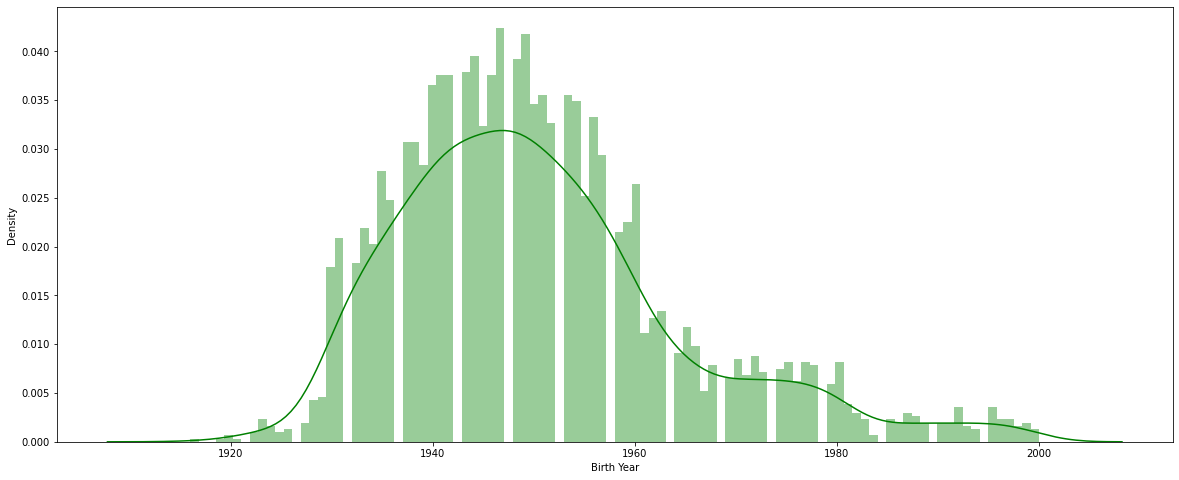

In [ ]:
# Distribution of Birth Year.

plt.figure(figsize=(20, 8))
sns.distplot(df['Birth Year'], color='g', bins=100, hist_kws={'alpha': 0.4});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


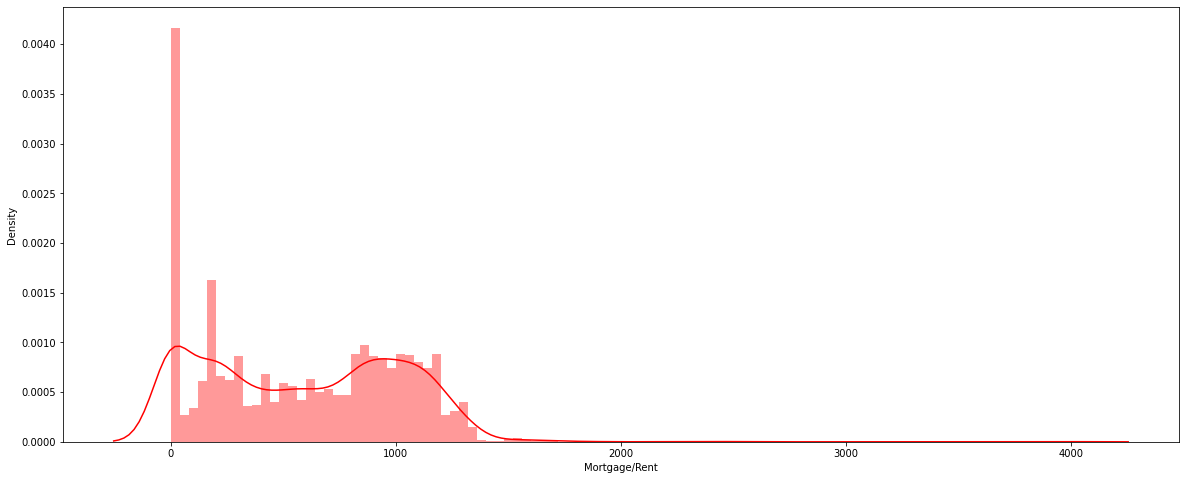

In [ ]:
# Distribution of Mortgage/Rent.

plt.figure(figsize=(20, 8))
sns.distplot(df['Mortgage/Rent'], color='r', bins=100, hist_kws={'alpha': 0.4});

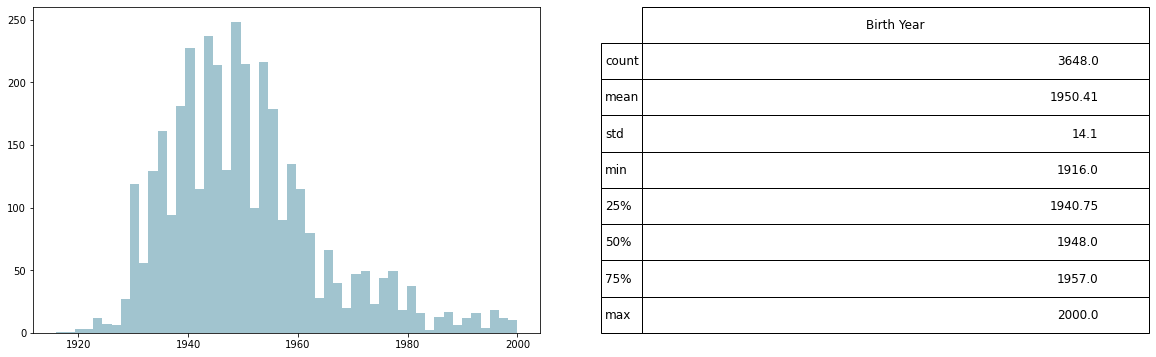

In [ ]:
# Another way to plot the distribution of birth year. 

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
ax1.hist(df['Birth Year'], bins=50, color='#a1c4cf')

dfxx = df['Birth Year'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

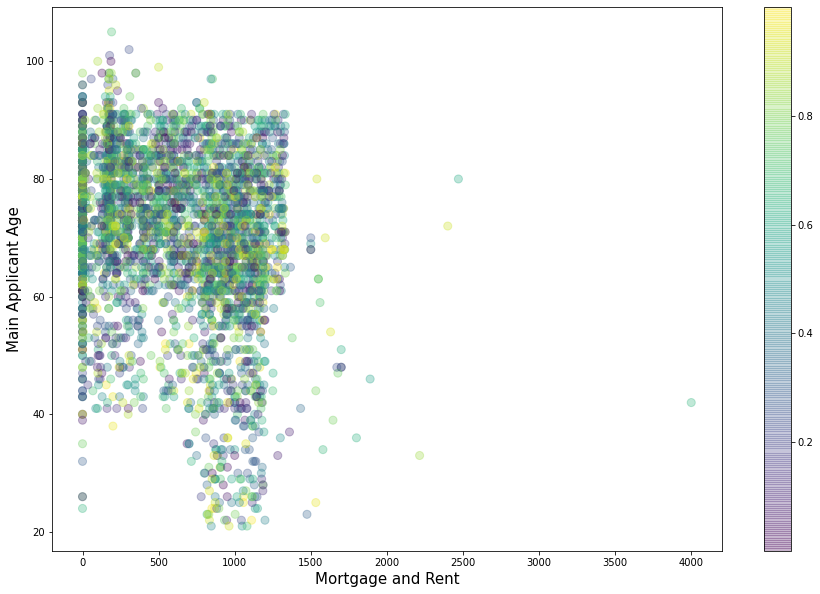

In [ ]:
# Plotting Applicant Age vs Mortgage/Rent to see if the amount of rent they're paying have to do with how old they are
import random as rand
np.random.seed(19680801)
N = 3650
colors = np.random.rand(N)
sizes = 3650
fig = plt.figure(figsize=(15,10))


plt.scatter(df['Mortgage/Rent'], df['Applicant Age'], c=colors,s=65, alpha=0.3,
            cmap='viridis')
plt.xlabel("Mortgage and Rent", size=15)
plt.ylabel("Main Applicant Age", size=15)
plt.colorbar(); 

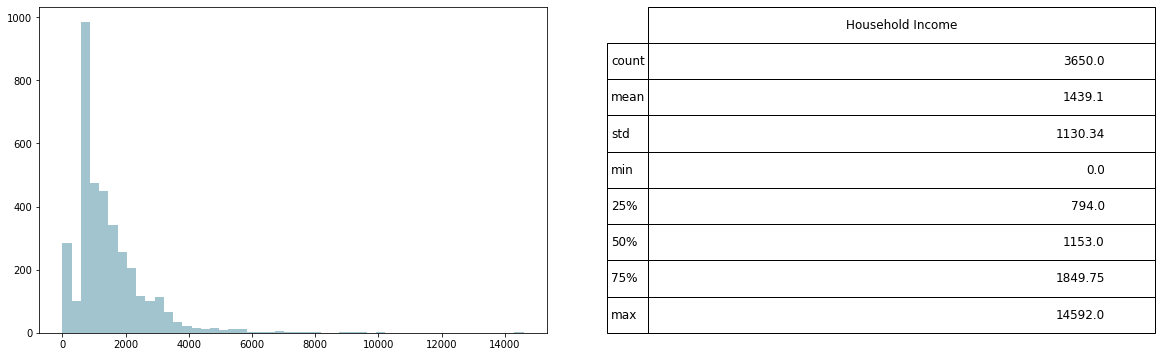

In [ ]:
# Distribution of Income

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
ax1.hist(df['Household Income'], bins=50, color='#a1c4cf')

dfxx = df['Household Income'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
font_size=12
bbox=[0, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=bbox, colLabels=dfxx.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)

In [ ]:
# Check for household income outliers

# df.loc[df['Household Income'] > 10000]

In [ ]:
# Check for high rents

# df.loc[df['Mortgage/Rent'] > 2000]

Text(0, 0.5, 'Zip Code')

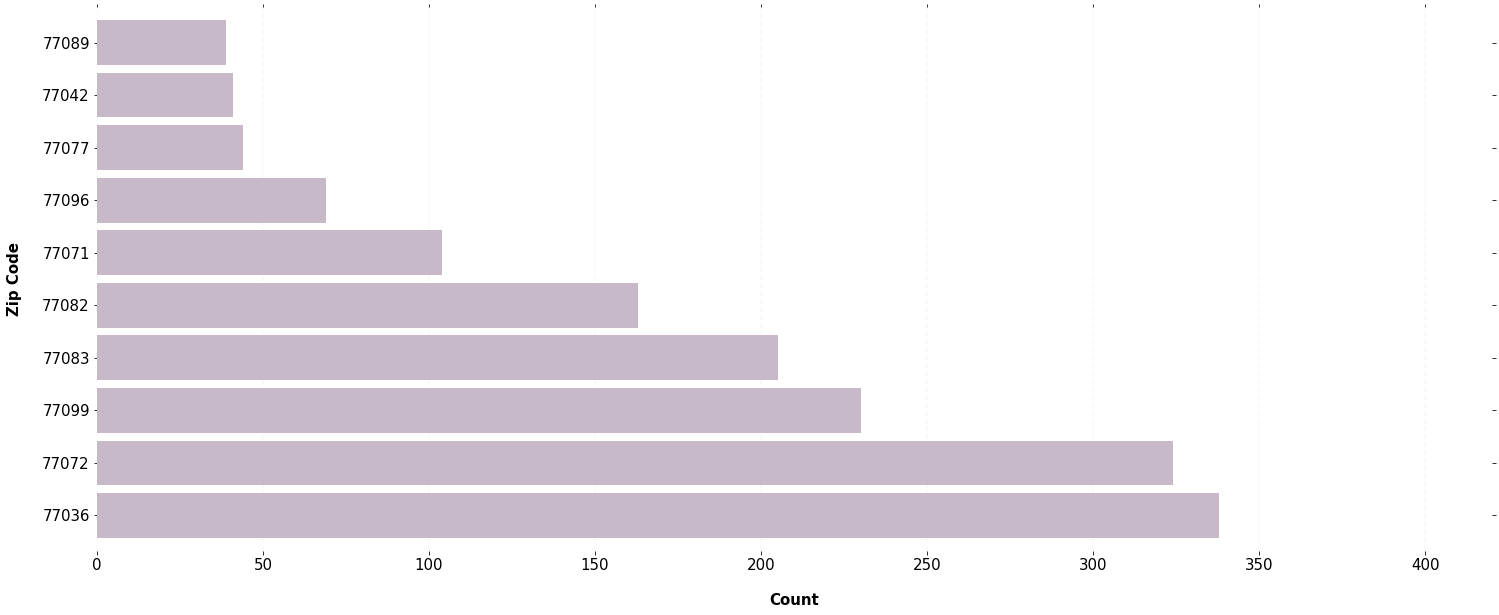

In [ ]:
# Top 10 zip code

zip = df['Zip Code'].value_counts().head(10)
ax = zip.plot(kind='barh', figsize=(25, 10), color='#c8b9c9', zorder=2, width=0.85)

#Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
     ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel("Count", labelpad=20, weight='bold', size=15)
ax.set_ylabel("Zip Code", labelpad=20, weight='bold', size=15)

In [ ]:
# Race represented

df['Applicant Race and Ethnicity'].value_counts(normalize=True).head(10)*100

Asian                 47.026583
Black                 14.579337
White                 12.469170
Hispanic or Latino    11.756646
Two or More Races     11.564812
Hispanic / Latino      1.918334
Others                 0.630310
American Indian        0.027405
Two or more races      0.027405
Name: Applicant Race and Ethnicity, dtype: float64

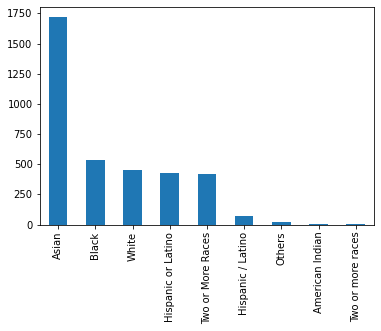

In [ ]:
df['Applicant Race and Ethnicity'].value_counts().plot(kind='bar')

In [ ]:
# Owner or Renter

df['Owner/Renter'].value_counts(normalize=True).head(10)*100

Renter    56.508633
Owner     43.491367
Name: Owner/Renter, dtype: float64

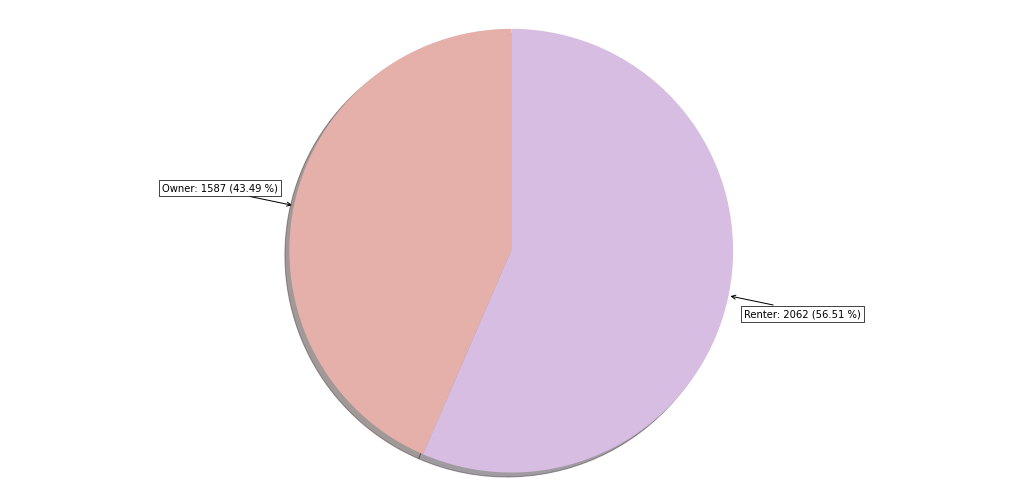

In [ ]:
# Owner and Renter Plot

Sector = df.groupby('Owner/Renter').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [ ]:
# Where clients residing at?

df['Type Of House'].value_counts(normalize=True).head(10)*100

Apartment             42.724034
Single Family Home    40.942724
Townhouse             16.141409
Duplex                 0.082214
Mobile Home            0.054810
Others                 0.054810
Name: Type Of House, dtype: float64

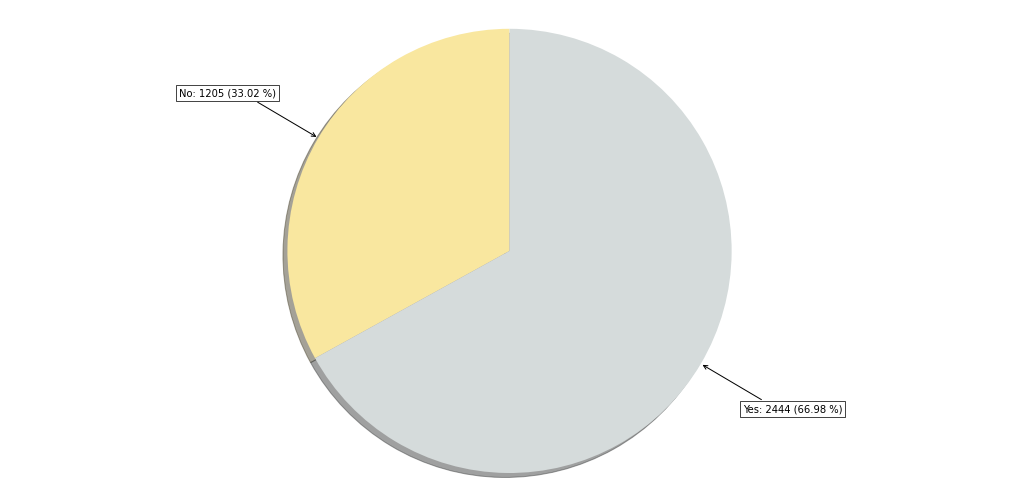

In [ ]:
# Do the clients earn an income? 

Sector = df.groupby('Income').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

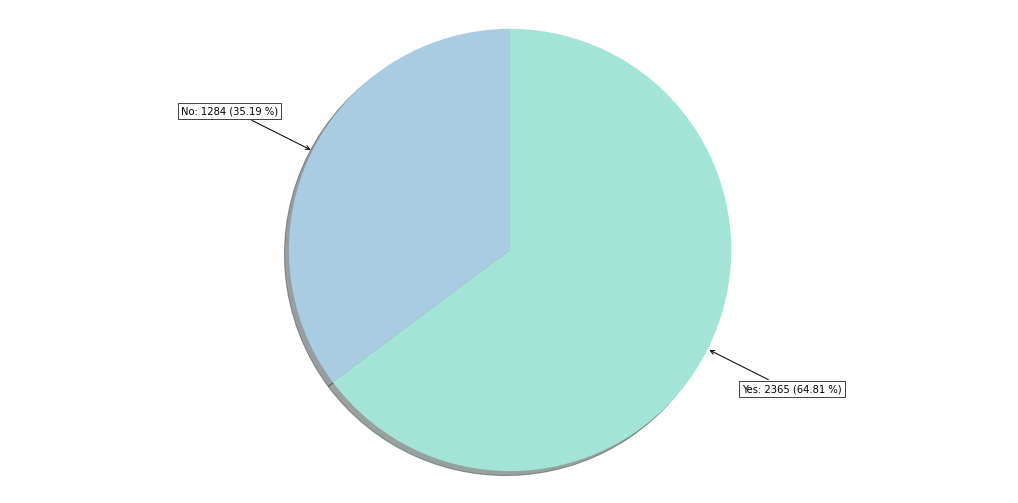

In [ ]:
# Are the clients U.S citizen?

Sector = df.groupby('US Citizen').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="->"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.05*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [ ]:
df['Applicant Gender'].value_counts()

Female    1853
Male      1796
Name: Applicant Gender, dtype: int64

In [ ]:
df['Household Member 2 - Gender'].value_counts()

Female    1139
Male       857
Name: Household Member 2 - Gender, dtype: int64

In [ ]:
# Check columns with high correlation

threshold = 0.50

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

high_corr = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns with high correlation greater than 0.5.' % (len(high_corr)))
pd.DataFrame(high_corr)

There are 9 columns with high correlation greater than 0.5.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,0
0,Applicant Age
1,Household Member 2 - Age
2,Household Member 3 - Age
3,Household Member 3 - Monthly Pretax Income
4,Birth Year - 4
5,Household Member 4 - Age
6,Household Member 4 - Monthly Pretax Income
7,Household Avg Age
8,Household Income


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


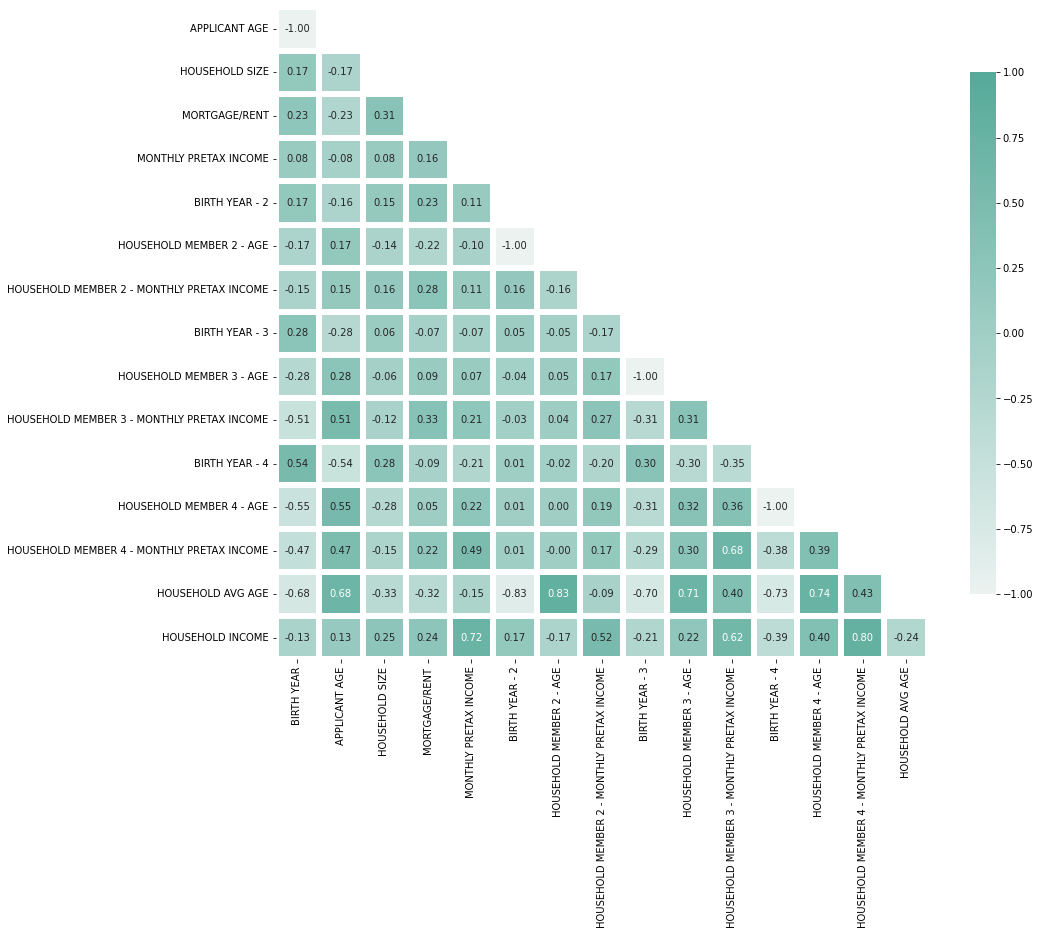

In [ ]:
corr = df.corr()

# Correlation heatmap
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

cmap = sns.color_palette("light:#5A9", as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)

plt.show()

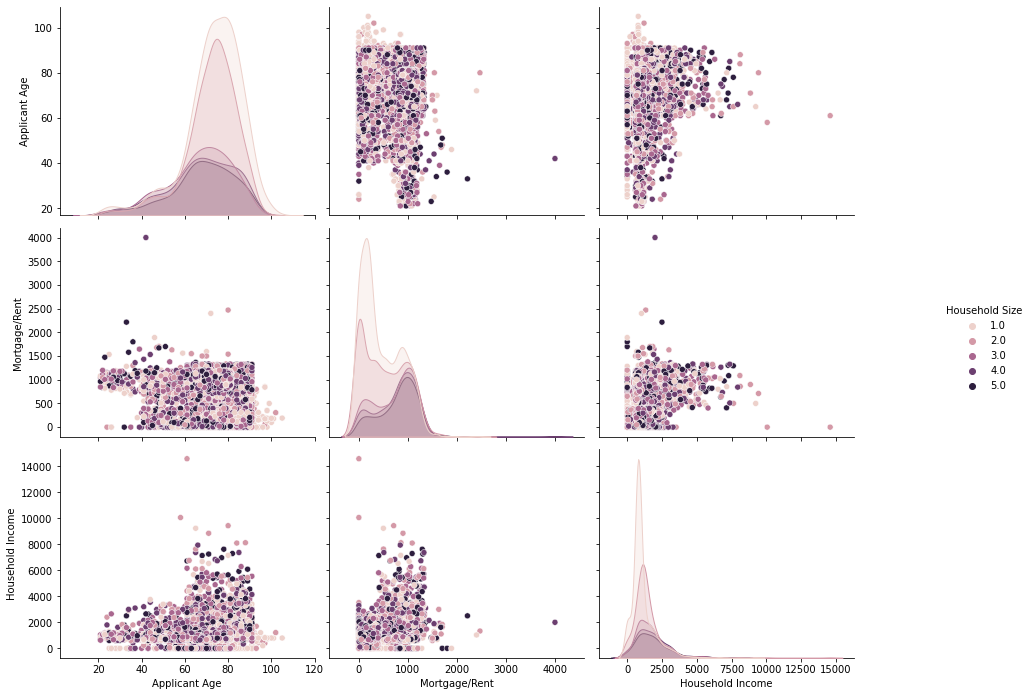

In [ ]:
# SNS pairplot 

g=sns.pairplot(df[['Applicant Age', 'Mortgage/Rent', 'Household Income', 'Household Size']], hue='Household Size')
g.fig.set_size_inches(15,10)

In [ ]:
# Save csv and excel to data visualization in Tableau

df.to_csv('ceap2.csv')

In [ ]:
df.to_excel('ceap3.xlsx')